# Model building For balanced dataset

## Prepared dataset

In [42]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import pickle

In [2]:
df_train_balanced=pd.read_csv('df_balanced.csv')
df_test=pd.read_csv('df_clean_test.csv')

In [3]:
#df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-5.199338,1.579968,1.186981,1.811457,1.023003,1.873053,0.509202,0.209327,0.029800,0.584551,...,0,0,0,0,0,1,0,0,1,0
1,-3.952911,-5.199338,0.901416,1.080589,0.384455,0.951518,0.432104,-0.930962,-2.413129,-0.373473,...,0,1,0,0,0,0,0,0,1,0
2,-3.517482,-5.199338,0.015055,-0.556927,-0.517790,-0.842694,0.979511,0.320742,0.598915,-0.296683,...,0,0,0,0,0,0,1,0,1,0
3,-3.454423,0.746351,0.533636,-0.188033,-0.341493,-0.211070,0.432104,1.060909,0.020689,2.104112,...,0,0,0,0,0,1,0,0,1,0
4,-3.400432,-5.199338,-1.346386,-0.999986,-0.692715,-0.842694,-1.264066,1.223112,-0.333524,-0.131798,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,3.229139,-5.199338,0.533636,-0.663276,0.288000,-0.842694,-1.264066,0.831209,-0.943986,-0.156744,...,0,0,0,0,0,1,0,0,1,0
8399,3.234652,-5.199338,-1.068522,-1.418119,-0.945616,-1.467860,-0.593940,0.744694,2.702784,0.737605,...,0,0,0,0,0,0,1,0,1,0
8400,3.339828,0.746351,-1.068522,0.605701,0.419115,0.444534,-0.729877,1.156164,-0.028916,0.344582,...,0,0,0,0,0,1,0,0,1,0
8401,4.110136,0.746351,-1.068522,0.135645,-0.844790,-0.139710,0.043924,-0.258665,-0.119468,-0.164297,...,0,0,0,0,0,0,1,0,1,0


In [5]:
df_train_balanced

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,2.571996,0,-5.199338,-1.368450,-0.257495,-0.257495,-0.086674,0.291367,-0.564986,1.018778,...,0,0,0,0,0,1,0,0,1,0
1,2.476608,0,-5.199338,1.088723,0.177827,0.202098,0.320290,5.199338,1.339147,-0.584288,...,0,1,0,0,0,0,0,0,1,0
2,0.081761,0,-5.199338,1.088723,0.118204,0.624172,-0.086674,5.199338,-0.108581,-0.044369,...,0,0,0,0,0,1,0,0,1,0
3,-0.475078,0,-5.199338,-0.091712,-0.132113,0.385388,-0.280911,-0.517790,0.889772,0.064289,...,0,0,0,0,0,0,1,0,1,0
4,-0.480132,0,-5.199338,0.459820,0.354822,0.545244,0.504922,5.199338,-1.459761,-2.159307,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,3.161930,1,0.733156,-0.421111,-0.189187,0.532893,-0.322932,0.180377,0.473331,-0.205941,...,0,0,0,0,0,0,1,0,1,0
7524,3.247057,1,0.733156,0.991746,0.429987,1.310640,0.377630,-0.075345,0.772027,-0.066450,...,0,0,0,0,0,1,0,0,1,0
7525,3.383887,1,-5.199338,0.071571,1.721914,1.044409,1.355761,1.132898,0.814576,-0.705530,...,0,0,0,0,0,0,1,0,1,0
7526,3.436495,1,0.733156,0.552537,-0.257495,0.490519,-0.086674,0.091712,1.370228,-0.688441,...,0,0,0,0,0,0,1,0,1,0


In [6]:
column_nan=df_train_balanced.columns.tolist()


In [8]:
column_test=df_test.columns.tolist()

In [9]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df_train_balanced, 'TARGET', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df_train_balanced[df_train_balanced.index.isin(val_idxs)], 'TARGET', val_percent=0.5)

In [10]:
train_df = df_train_balanced[df_train_balanced.index.isin(train_idxs)]

X_train = train_df[column_nan].values
Y_train = train_df[['TARGET']].values
print('Retrieved Training Data')
print(X_train.shape,'----',Y_train.shape)

val_df = df_train_balanced[df_train_balanced.index.isin(val_idxs)]
X_val = val_df[column_nan].values
Y_val = val_df[['TARGET']].values
print('Retrieved Validation Data')
print(X_val.shape,'----',Y_val.shape)

test_df = df_train_balanced[df_train_balanced.index.isin(test_idxs)]
X_test = test_df[column_nan].values
Y_test = test_df[['TARGET']].values
print('Retrieved Test Data')
print(X_test.shape,'----',Y_test.shape)

Retrieved Training Data
(5646, 213) ---- (5646, 1)
Retrieved Validation Data
(942, 213) ---- (942, 1)
Retrieved Test Data
(940, 213) ---- (940, 1)


In [11]:
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

## Random Forest

In [12]:
clf_balanced = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf_balanced.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(random_state=27, verbose=1)

In [13]:
predicted_labels = clf_balanced.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [14]:
accuracy_score(training_data['Y_test'], predicted_labels)

1.0

In [15]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf_balanced, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [16]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [17]:
getTrainScores(gsearch1)

({0: "mean:0.9330854307594629params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}",
  1: "mean:0.9314735414690736params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}",
  2: "mean:0.9420923834233443params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",
  3: "mean:0.9470515845332622params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}",
  4: "mean:0.9564374456210759params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}",
  5: "mean:0.9683011828150843params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}",
  6: "mean:0.9695420020850154params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}",
  7: "mean:0.9651175368600924params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}",
  8: "mean:0.9544908565023477params{'cri

In [18]:
clf2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(400,500,10),
    'max_depth'         : [11, 12,13]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = clf2, param_grid = params1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_estimators=450,
                                              random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': range(400, 500, 10)},
             scoring='f1_micro', verbose=10)

In [19]:
getTrainScores(gsearch2)

({0: "mean:0.9877796154479256params{'max_depth': 11, 'n_estimators': 400}",
  1: "mean:0.9877788316075782params{'max_depth': 11, 'n_estimators': 410}",
  2: "mean:0.9872480149243202params{'max_depth': 11, 'n_estimators': 420}",
  3: "mean:0.9874253196109016params{'max_depth': 11, 'n_estimators': 430}",
  4: "mean:0.9897271451750708params{'max_depth': 11, 'n_estimators': 440}",
  5: "mean:0.9872486419965982params{'max_depth': 11, 'n_estimators': 450}",
  6: "mean:0.9886653550404854params{'max_depth': 11, 'n_estimators': 460}",
  7: "mean:0.9886656685766242params{'max_depth': 11, 'n_estimators': 470}",
  8: "mean:0.9897274587112097params{'max_depth': 11, 'n_estimators': 480}",
  9: "mean:0.9879564498302985params{'max_depth': 11, 'n_estimators': 490}",
  10: "mean:0.9911437014508884params{'max_depth': 12, 'n_estimators': 400}",
  11: "mean:0.9918519795887974params{'max_depth': 12, 'n_estimators': 410}",
  12: "mean:0.9913205358332615params{'max_depth': 12, 'n_estimators': 420}",
  13: "me

In [20]:
clf2.predict(X_test[4,:].reshape(1,-1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished


array([0])

## Xgboost

In [21]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import seaborn as sns

In [25]:
#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    
    plot_compare(metrics,store,epochs)
    features = column_nan
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

In [26]:
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.76254	val-merror:0.00000	train-mlogloss:1.76253	train-merror:0.00000
[100]	val-mlogloss:0.00055	val-merror:0.00000	train-mlogloss:0.00053	train-merror:0.00000
[200]	val-mlogloss:0.00028	val-merror:0.00000	train-mlogloss:0.00028	train-merror:0.00000
[299]	val-mlogloss:0.00025	val-merror:0.00000	train-mlogloss:0.00025	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 1.0
XGBoost F1-Score (Micro): 1.0


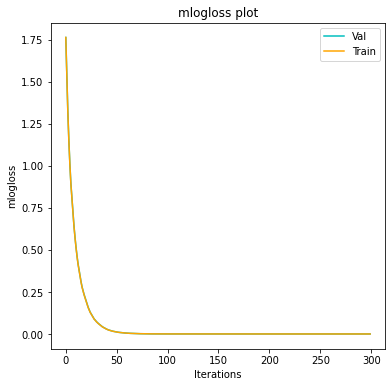

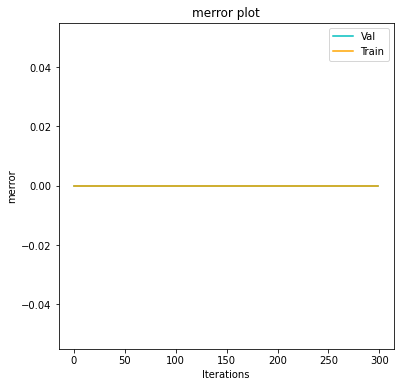

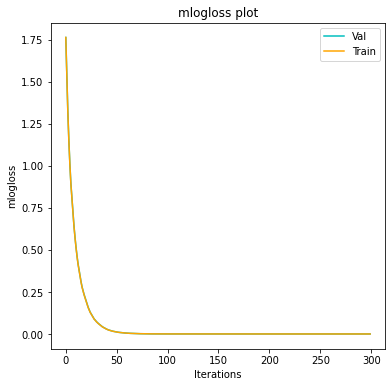

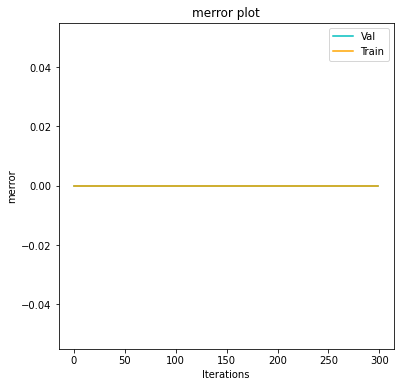

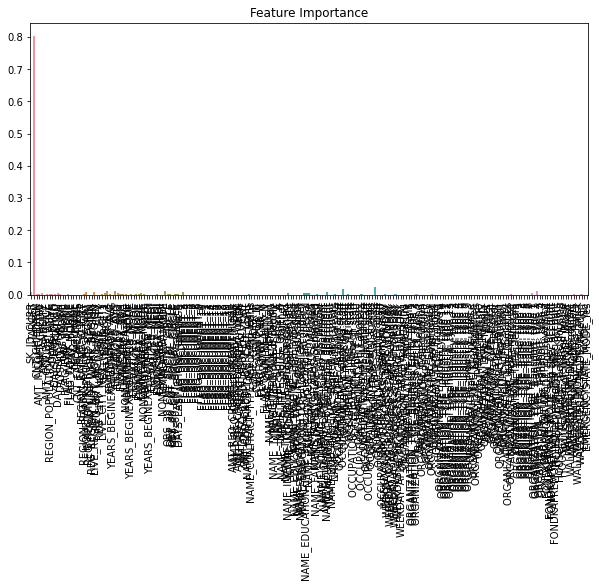

In [27]:
fitXgb(xgb1, training_data)

## Gradient boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
n_estimator=[100,200,300,400,500,600,800,1000]

In [32]:
for estimator in n_estimator:
    gb_clf = GradientBoostingClassifier(n_estimators=estimator, learning_rate=0.01, max_features=2, max_depth=12, random_state=0)
    gb_clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0]))

    print("n_estimator: ", estimator)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, Y_val)))

n_estimator:  100
Accuracy score (training): 1.000
Accuracy score (validation): 0.953
n_estimator:  200
Accuracy score (training): 1.000
Accuracy score (validation): 0.961
n_estimator:  300
Accuracy score (training): 1.000
Accuracy score (validation): 0.961
n_estimator:  400
Accuracy score (training): 1.000
Accuracy score (validation): 0.966
n_estimator:  500
Accuracy score (training): 1.000
Accuracy score (validation): 0.969
n_estimator:  600
Accuracy score (training): 1.000
Accuracy score (validation): 0.971
n_estimator:  800
Accuracy score (training): 1.000
Accuracy score (validation): 0.984
n_estimator:  1000
Accuracy score (training): 1.000
Accuracy score (validation): 0.993


In [33]:
predicted_labels = clf_balanced.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
accuracy_score(training_data['Y_test'], predicted_labels)

1.0

In [35]:
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, Y_val)))


Accuracy score (training): 1.000
Accuracy score (validation): 0.993


In [38]:
gb_clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_features=2, max_depth=12, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(Y_val, predictions))

print("Classification Report")
print(classification_report(Y_val, predictions))

/Users/juseimandi/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix:
[[470   1]
 [  6 465]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       471
           1       1.00      0.99      0.99       471

    accuracy                           0.99       942
   macro avg       0.99      0.99      0.99       942
weighted avg       0.99      0.99      0.99       942



### Bibliographie